In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# załaduj dane
train = pd.read_csv("./data/fashion-mnist_train.csv")
test = pd.read_csv("./data/fashion-mnist_test.csv")
train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


z powyższej tabeli wynika, że mamy 10 etykiet
<br>
Znaczenie etykiet:
* 0 	T-shirt/top
* 1 	Trouser
* 2 	Pullover
* 3 	Dress
* 4 	Coat
* 5 	Sandal
* 6 	Shirt
* 7 	Sneaker
* 8 	Bag
* 9 	Ankle boot

In [3]:
labels = ['T-shirt\\top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# podziel danych na do nauki i testu
x_train, y_train = train.loc[:, train.columns != 'label']/255, train['label']
x_test, y_test = test.loc[:, test.columns != 'label']/255, test['label']

T-shirt\top


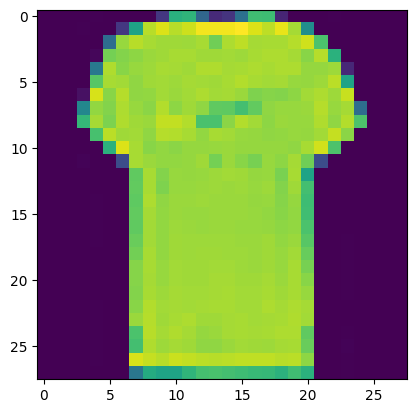

In [5]:
# wizualizacja danych
n=10
print(labels[y_train[n]])
plt.imshow(x_train.loc[n].values.reshape(28,28))

In [6]:
epochs = 100
val_split = 0.25

In [7]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode='min',
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)

In [8]:
# funkcja do wykresów dokładności i funkcji kosztu
def show(history):
    loss = history.history['loss']
    accuracy = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_accuracy = history.history['val_accuracy']

    passed = len(loss)
    t = np.arange(0, passed, 1)

    fig, ax = plt.subplots()
    ax.plot(t, accuracy, label='train')
    ax.plot(t, val_accuracy, label='val')
    ax.set(xlim=(0,passed), xticks=t, xticklabels=t+1, title='Accuracy')
    ax.legend()
    plt.show()

    fig, ax = plt.subplots()
    ax.plot(t, loss, label='train')
    ax.plot(t, val_loss, label='val')
    ax.set(xlim=(0,passed), xticks=t, xticklabels=t+1, title='Loss')
    ax.legend()
    plt.show()

moim pierwszym wyborem była tradycyjna sieć neuronowa, przetestowałem 2 warianty

313/313 - 0s - 1ms/step - accuracy: 0.8890 - loss: 0.3156


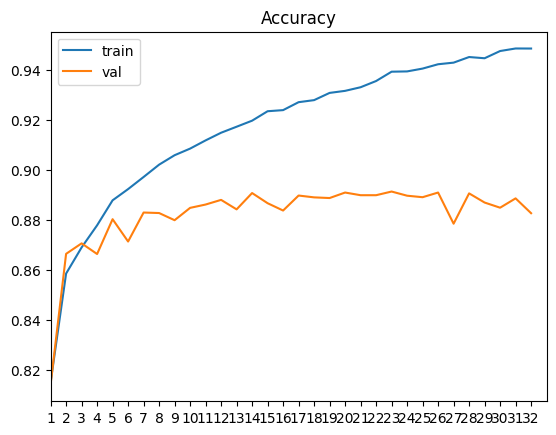

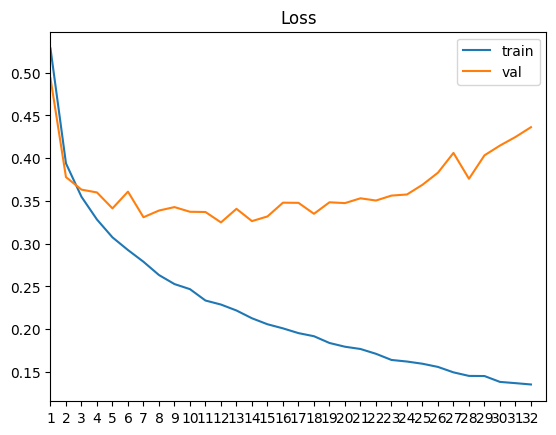

In [9]:
# zwykła sieć neuronowa, 1 warstwa ukryta

model1 = tf.keras.models.Sequential([
  tf.keras.layers.Input((784,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

optimizer = tf.keras.optimizers.Adam()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model1.compile(
    optimizer=optimizer,
    loss=loss_fn,
    metrics=['accuracy']
)

history1 = model1.fit(x_train, y_train, validation_split=val_split, epochs=epochs, verbose=0, callbacks=[early_stopping])
model1.evaluate(x_test,  y_test, verbose=2) 

show(history1)

313/313 - 0s - 1ms/step - accuracy: 0.8217 - loss: 0.4665


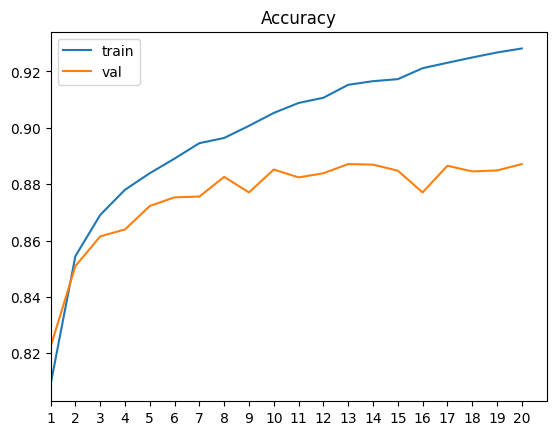

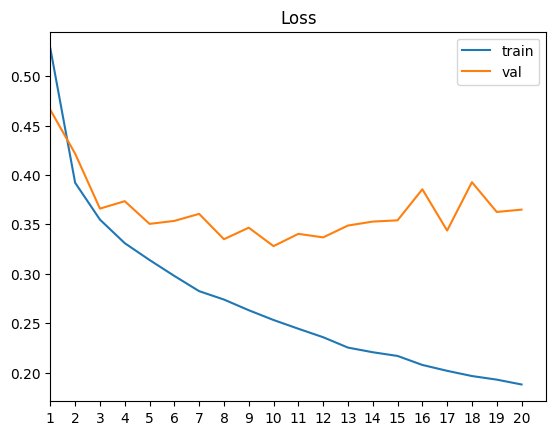

In [10]:
# zwykła sieć neuronowa, 4 warstwy ukryta
model4 = tf.keras.models.Sequential([
  tf.keras.layers.Input((784,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

optimizer = tf.keras.optimizers.Adam()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model4.compile(
    optimizer=optimizer,
    loss=loss_fn,
    metrics=['accuracy']
)

history4 = model4.fit(x_train, y_train, validation_split=val_split, epochs=epochs, verbose=0, callbacks=[early_stopping])
model4.evaluate(x_test,  y_test, verbose=2)
show(history4)

Zwiększając głębokość sieci, nie uzsykaliśmy zwiększenia dokładności<br>W obu przypadkach dokładność ~88%, dosyć niska, wystęuje także overfitting

In [11]:
# zmiana kształtu danych pod sieć konwolucyjną
x_train_cnn = x_train.values.reshape((60000, 28,28))
x_test_cnn = x_test.values.reshape((10000, 28,28))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9125 - loss: 0.2474


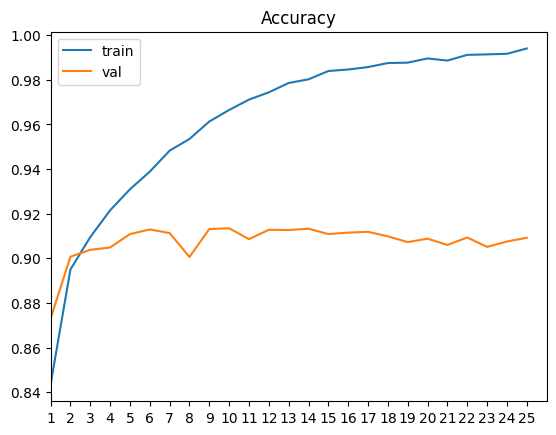

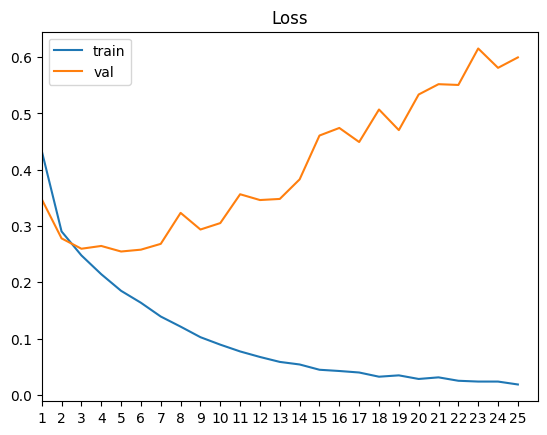

In [12]:
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Input((28,28,1)),
    tf.keras.layers.Conv2D(32, (3,3), padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

optimizer = tf.keras.optimizers.Adam()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model_cnn.compile(optimizer='adam', metrics=['accuracy'], loss=loss_fn)

initial_weights = model_cnn.get_weights()

history_cnn = model_cnn.fit(x_train_cnn, y_train, validation_split=val_split, epochs=epochs, verbose=0, callbacks=[early_stopping])
model_cnn.evaluate(x_test_cnn, y_test)

show(history_cnn)

cnn radzi sobie dużo lepiej, dokładność ~91%, ale występuje overfitting, rekompensuje to early stopping<br>
jaki learning rate jest najlepszy?

In [13]:
# learning_rate=0.01
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model_cnn.compile(optimizer='adam', metrics=['accuracy'], loss=loss_fn)
# reset wag
model_cnn.set_weights(initial_weights)

history_cnn = model_cnn.fit(x_train_cnn, y_train, validation_split=val_split, epochs=epochs, verbose=0, callbacks=[early_stopping])
model_cnn.evaluate(x_test_cnn, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9193 - loss: 0.2351


[0.22578534483909607, 0.9210000038146973]

In [14]:
# learning_rate=0.1
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model_cnn.compile(optimizer='adam', metrics=['accuracy'], loss=loss_fn)
# reset wag
model_cnn.set_weights(initial_weights)

history_cnn = model_cnn.fit(x_train_cnn, y_train, validation_split=val_split, epochs=epochs, verbose=0, callbacks=[early_stopping])
model_cnn.evaluate(x_test_cnn, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8821 - loss: 0.3296


[0.3242349326610565, 0.8853999972343445]

In [15]:
# learning_rate=0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model_cnn.compile(optimizer='adam', metrics=['accuracy'], loss=loss_fn)
# reset wag
model_cnn.set_weights(initial_weights)

history_cnn = model_cnn.fit(x_train_cnn, y_train, validation_split=val_split, epochs=epochs, verbose=0, callbacks=[early_stopping])
model_cnn.evaluate(x_test_cnn, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8713 - loss: 0.3401


[0.33211275935173035, 0.8766999840736389]

In [16]:
# learning_rate=0.00001
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model_cnn.compile(optimizer='adam', metrics=['accuracy'], loss=loss_fn)
#reset wag
model_cnn.set_weights(initial_weights)

history_cnn = model_cnn.fit(x_train_cnn, y_train, validation_split=val_split, epochs=epochs, verbose=0, callbacks=[early_stopping])
model_cnn.evaluate(x_test_cnn, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8576 - loss: 0.3801


[0.3715278208255768, 0.8633999824523926]

sieć uzyskuje najlepsze wyniki dla learning rate = 0.01

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9234 - loss: 0.2090


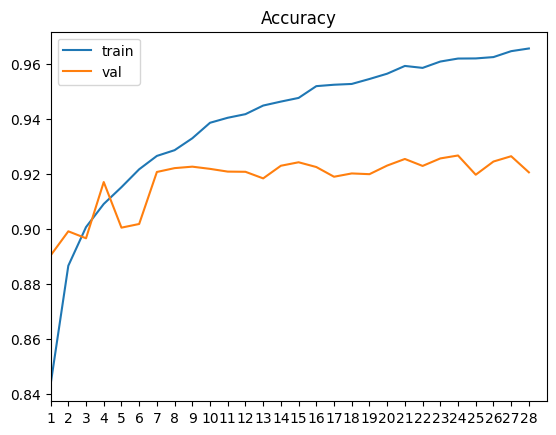

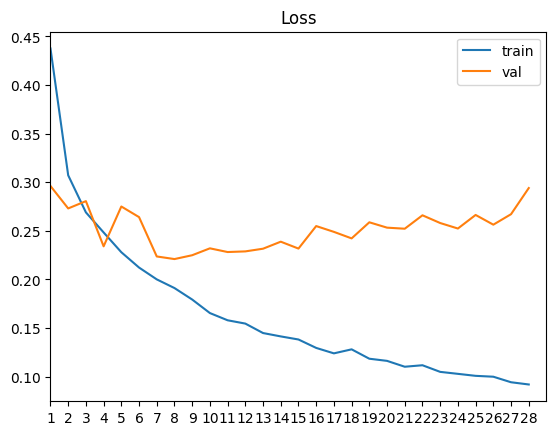

In [17]:
model_cnn2 = tf.keras.Sequential([
    tf.keras.layers.Input((28,28,1)),
    tf.keras.layers.Conv2D(32, (3,3), padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model_cnn2.compile(optimizer='adam', metrics=['accuracy'], loss=loss_fn)

history_cnn2 = model_cnn2.fit(x_train_cnn, y_train, validation_split=val_split, epochs=epochs, verbose=0, callbacks=[early_stopping])
model_cnn2.evaluate(x_test_cnn, y_test)

show(history_cnn2)

po dodaniu dropout i batch normalization, dokładność ~92% <br>
być może zmiany w warstawch konwolucyjnych poprawiły by dokładność<br>
warto byłoby także sprawdzić jaki wpływ ma rozmiar batcha na naukę<br>

### Źródła
* https://medium.com/@ipylypenko/exploring-neural-networks-with-fashion-mnist-b0a8214b7b7b
* https://arxiv.org/pdf/1206.5533
* https://machinelearningmastery.com/how-to-reduce-overfitting-with-dropout-regularization-in-keras/
* https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939